In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros e constantes da simulação

In [2]:
N = 10**2                       # N sistemas de 3 estados
kB = 1.                         # constante de Boltzmann kB=1
M = 10**4 + 20                  # Número de passos de Monte Carlo da simulação
T = np.linspace(.1, 10., 100)   # 100 temperaturas igualmente espaçadas
                                # entre 0.1 e 10.0
beta = 1/(kB*T)

rng = np.random.default_rng()

# Matrizes que armazenam os estados

In [3]:
# escolhemos estado inicial e alterações possiveis aleatórios
s_t = rng.choice([.0,1.,8.], size=(M+1,T.size,N))

# sinal aleatório para implementar metrópolis
aceite_arr = rng.random(size=(M,T.size,N))

# Laço principal

In [4]:
# Percorremos os passos de Monte Carlo
for k in range(M):     
    # Cada átomo tem chance de mudar
    delta_E = s_t[k+1] - s_t[k]    
    
    # Decidimos aceite pelo algoritmo de metrópolis
    aceite_rand = aceite_arr[k] < np.exp(-beta*(delta_E.T)).T 
    
    # Registramos os estados a cada passo de Monte Carlo
    s_t[k+1] = s_t[k+1]*aceite_rand + s_t[k]*(~aceite_rand)   

# Equilibração

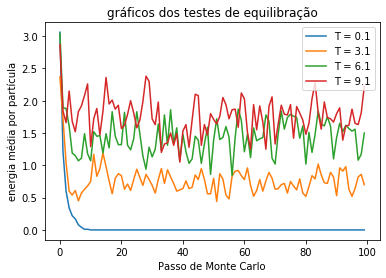

In [5]:
plt.plot((s_t[:100,0::30]).mean(axis=2))
plt.title("gráficos dos testes de equilibração")
plt.ylabel("energia média por partícula")
plt.xlabel("Passo de Monte Carlo")
plt.legend([f'T = {round(t, 1)}'for t in T[0::30]], loc='upper right')
plt.show()

In [6]:
s_t_eq = s_t[21:]   # system thermalization

# Estatistica

In [7]:
# particionamento
E = np.stack(np.split(s_t_eq.sum(axis=2), s_t_eq.shape[0]**(1/2)),
             axis=1)

U = E.mean(axis=0)  # energia interna

# calor específico por átomo da coleção
C = ((E**2).mean(axis=0)-E.mean(axis=0)**2)/(N*T**2) 

U_mean, C_mean = U.mean(axis=0), C.mean(axis=0) # media final

# Estimativa de erros

In [8]:
# desvio padrão da média
def std_mean(dist): 
    e = dist.mean(axis=0)       # 1ro momento
    e2 = (dist**2).mean(axis=0) # 2do momento
    return ((e2-e**2)/(dist.shape[0] - 1))*(1/2)

U_std, C_std = std_mean(U), std_mean(C)

# Exibição dos gráficos

## energia interna

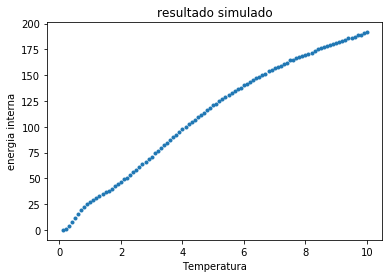

In [9]:
plt.errorbar(T, U_mean, yerr=U_std, fmt='.')
plt.title("resultado simulado")
plt.ylabel("energia interna")
plt.xlabel("Temperatura")
plt.show()

## calor específico por átomo da coleção

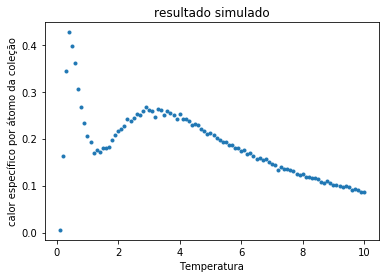

In [10]:
plt.errorbar(T, C_mean, yerr=C_std, fmt='.')
plt.title("resultado simulado")
plt.ylabel("calor específico por átomo da coleção")
plt.xlabel("Temperatura")
plt.show()

## calor específico por temperatura

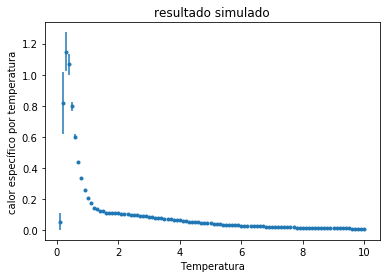

In [11]:
plt.errorbar(
    T, 
    C_mean/T,
    yerr=(C_mean/T)*(((C_std/C_mean)**2 + ((9.9/100)/T)**2)**(1/2))**2, 
    fmt='.'
)
plt.title("resultado simulado")
plt.ylabel("calor específico por temperatura")
plt.xlabel("Temperatura")
plt.show()

# localizar a posição do pico com incerteza de 0.2

## 1ro pico (0 < T < 2)

In [12]:
T_max1 = T[C[:,:20].argmax(axis=1)] # recorte
T_max1_mean = np.mean(T_max1)

print(f'a posição estimada para o 1ro pico é: {T_max1_mean}')
print(f'com incerteza de: {std_mean(T_max1)}')

a posição estimada para o 1ro pico é: 0.47200000000000003
com incerteza de: 5.260606060606037e-05


## 2do pico (20 < T)

In [13]:
T_max2 = T[C[:,20:].argmax(axis=1) + 20]    # recorte
T_max2_mean = np.mean(T_max2)

print(f'a posição estimada para o 1ro pico é: {T_max2_mean}')
print(f'com incerteza de: {std_mean(T_max2)}')

a posição estimada para o 1ro pico é: 3.22
com incerteza de: 0.001609090909090909


# Estimativa da razão entre as temperaturas correspondentes aos picos

In [14]:
print(
f"""Estimativa da razão entre as temperaturas correspondentes aos picos: 
{T_max2_mean/T_max1_mean}"""
)

Estimativa da razão entre as temperaturas correspondentes aos picos: 
6.822033898305085


## intepretação física para essa razão

A razão estimada entre as temperaturas correspondentes aos picos (aprox.
7) é semelhante a razão da  variação de energia entre níveis de energia 
consecutivos de micro-estados. Estes picos na curva do calor específico, 
em limite de coleções grandes, conevergem para a temperatura crítica de 
mudança do macro-estado.

Assim, esta razão entre os picos, pode ser interpretada como resultado 
da estatística de microestados que mostra intervalos proporcionais de 
temperatura  com a energia do micro-estado predominante relatiava à 
energia do estado fundamental.